In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import pytesseract


In [2]:
dat_path = "/Users/jasonli/Desktop/BU/Junior/Spring2021/CS791/sandbox/herb_dat"
# img_path = os.path.join(dir_path, 'data')

In [5]:
# img_path = os.path.join(dir_path, '134_Aquilegia.jpg')
# img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
imgs = []

for img_name in os.listdir(dat_path):
    if (".jpg" in img_name):
        img_path = os.path.join(dat_path, img_name)
        imgs.append(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE))

# 471_Aquilegia
# 834_Trillium

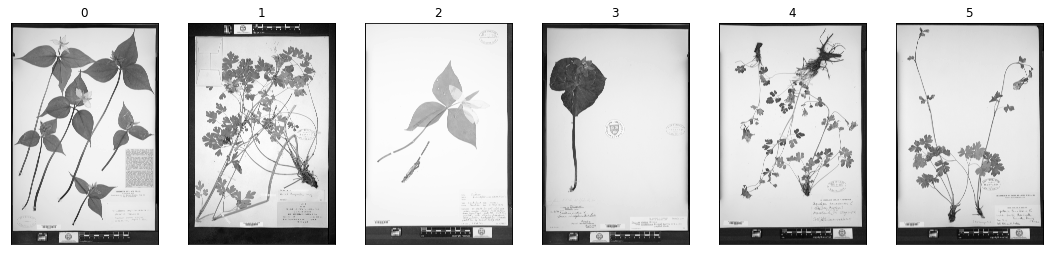

In [6]:
n_imgs = len(imgs)

fig, axes = plt.subplots(1, n_imgs)
fig.set_size_inches(18.5, 10.5)
# plt.imshow(imgs[0], cmap="gray")
for i, img in enumerate(imgs):
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(i)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

In [7]:
img = imgs[5]

## Preprocessing- blur/thresh

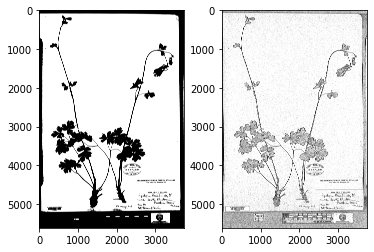

In [8]:
t = cv2.blur(img, (5, 5))
# t=img.copy()
_, b = cv2.threshold(t, 180, 255, cv2.THRESH_BINARY) 
b_t = cv2.adaptiveThreshold(t,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(b, cmap="gray")
axes[1].imshow(b_t, cmap="gray")

image_final = cv2.bitwise_and(t, t, mask=b)
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)
# plt.imshow(new_img, cmap="gray")


## Image smoothing/edge detect

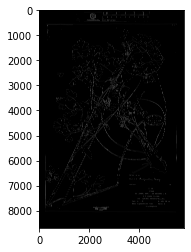

In [8]:
## UNUSED
can = cv2.Canny(b, 100, 200) 
plt.imshow(can,cmap='gray')

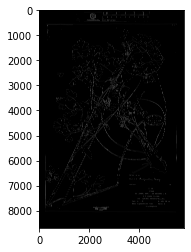

In [115]:
## UNUSED
kernel = np.ones((5,5), np.float32)/10
nod = cv2.filter2D(b, -1, kernel)
plt.imshow(can,cmap='gray')

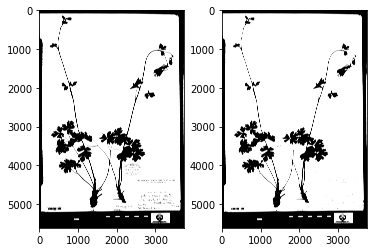

In [9]:
kdim = 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(kdim,kdim))
# kernel = np.ones((kdim,kdim), np.uint8)
dilation = cv2.dilate(b,kernel,iterations = 1)
dilation2 = cv2.dilate(b,kernel,iterations = 2) # just a test

inv = cv2.bitwise_not(dilation)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dilation, cmap="gray")
axes[1].imshow(dilation2, cmap="gray")

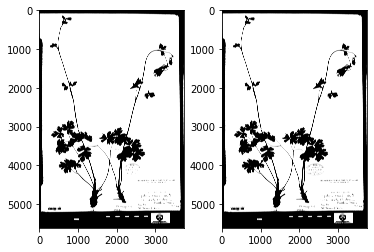

In [10]:
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
kernel = np.ones((3,3), np.uint8)
morph_close = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
morph_open = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(morph_close, cmap="gray")
axes[1].imshow(morph_open, cmap="gray")

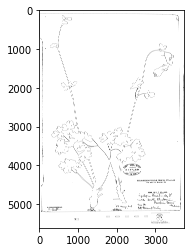

In [11]:
xor = cv2.bitwise_not(cv2.bitwise_xor(b, morph_close))
plt.imshow(xor,cmap='gray')

In [ ]:
## Goal up till here has been to remove as much as the plant as possible while keeping as much text as possible

## Contours

2025


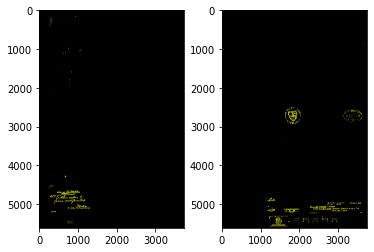

In [10]:
## With pytesseract, can skip this
contours,heirarchy = cv2.findContours(xor, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_output = cv2.cvtColor(np.zeros(np.shape(img), dtype='uint8'), cv2.COLOR_GRAY2BGR) 

contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
n_contours = len(contours)
print(n_contours)
# x,y,w,h = cv2.boundingRect(contours[max_index])
# cv2.rectangle(contour_output,(x,y),(x+w,y+h),(255, 255,0),10)
cont_important = contours
cont_important = contours[500:1000]


cv2.drawContours(contour_output, cont_important, -1, (255, 255, 0), thickness=cv2.FILLED)

areas = [cv2.contourArea(c) for c in cont_important]
areas.remove(max(areas))
max_index = np.argmax(areas)
x,y,w,h = cv2.boundingRect(cont_important[max_index])
cv2.rectangle(contour_output,(x,y),(x+w,y+h),(255, 255,255),10)
# plt.imshow(contour_output,cmap='gray')



contour_output2 = cv2.cvtColor(np.zeros(np.shape(img), dtype='uint8'), cv2.COLOR_GRAY2BGR) 
cont_important = contours[int(n_contours/2):]
cv2.drawContours(contour_output2, cont_important, -1, (255, 255, 0), thickness=cv2.FILLED)


fig, axes = plt.subplots(1, 2)
axes[0].imshow(contour_output, cmap="gray")
axes[1].imshow(contour_output2, cmap="gray")


In [12]:
## This is where pytesseract extracts the text for each image
im2 = xor.copy()
contours,heirarchy = cv2.findContours(xor, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
file = open("recognized.txt", "w+") 
file.write("") 
file.close() 


for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
      
    # Open the file in append mode 
    file = open("recognized.txt", "a") 
      
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
      
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close 

1863


In [14]:
text = pytesseract.image_to_string(imgs[5]) 

In [15]:
print(text)

' \n\nPE FIL IEG\n\n     \n\n  \n    \n \n\n    \n  \n    \n    \n\n    \n   \n\n{ HERBA PP\nQh ——— op\n\n&\nHARVARD\n\n   \n\n \n\n—_—_&——_\nOniversit>\n\nHERBARIUM OF EMILE FRANCIS WILLIAMS\n\nGIVEN TO THE GRAY HERBARIUM, 1913\n\nHERB. EMILE ¥. WILLIAMS.\nWiyrideg io a OA DUALS, ne\nVoadarid oo Oheaterolh,\nle\nMay 14o4 ie a\n\nTHE HARVARD UNIVERSITY HERBARIA e 20.0 ¥ = {4 $5 s ; e\nAMIN 0 | 8 Colt. Kita OVoler\n\n \n\n{rw\n\n \n\n(ope\n\nby @\n\ncopyright reserved sciatic\n\nHerbaria\n© 2007 The President and Fellows of Harvard College\n\x0c'

In [ ]:
# lexicon = ["AQUILEGIA", "Trillium"]

## Get data from HUH

In [37]:
url='https://huh-it.s3.amazonaws.com/huh-taxon-table.csv'
nrows=50000
huh_save_name = os.path.join(dat_path, 'huh_dat_top'+str(nrows)+'.csv')

huh_dat = pd.read_csv(url, nrows=nrows)
huh_dat.to_csv(huh_save_name)

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (9,24,26,27,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
huh_dat = pd.read_csv(huh_save_name)

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,28,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
print(huh_dat.shape)
print(huh_dat.columns)

Index(['Unnamed: 0', 'TaxonID', 'TimestampCreated', 'TimestampModified',
       'Author', 'CitesStatus', 'COLStatus', 'CommonName', 'CultivarName',
       'EnvironmentalProtectionStatus', 'EsaStatus', 'FullName', 'GroupNumber',
       'GUID', 'HighestChildNodeNumber', 'IsAccepted', 'IsHybrid',
       'IsisNumber', 'LabelFormat', 'Name', 'NcbiTaxonNumber', 'NodeNumber',
       'RankID', 'Remarks', 'Source', 'TaxonomicSerialNumber', 'Text1',
       'Text2', 'UnitInd1', 'UnitInd2', 'UnitInd3', 'UnitInd4', 'UnitName1',
       'UnitName2', 'UnitName3', 'UnitName4', 'UsfwsCode', 'Visibility',
       'AcceptedID', 'StdExAuthorID', 'TaxonTreeDefItemID', 'HybridParent2ID',
       'StdAuthorID', 'ParentID', 'CitInAuthorID', 'SanctAuthorID',
       'ParAuthorID', 'BasionymID', 'HybridParent1ID', 'ParExAuthorID',
       'VisibilitySetByID', 'ParSanctAuthorID', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unna

In [50]:
names = huh_dat["FullName"].str.lower()

In [51]:
names

0                    life
1        austrocalyxaceae
2               polycalyx
3               avenaceae
4            averrhoaceae
               ...       
49995         leptochiton
49996     cryptostephanus
49997           narcissus
49998         stenomesson
49999            laticoma
Name: FullName, Length: 50000, dtype: object

In [52]:
print(len(np.unique(names)))

49805


In [59]:
sum([1 if "trillium" in n else 0 for n in names])
# trillium aquilegia

0